In [ ]:
#Implement the classification model using clustering for the following techniques 
#with hierarchical clustering with Prediction, Test Score and Confusion Matrix
#DATASET : segmented_customers.csv

#Importing all the dependencies/ libraries
#Loading the dataset
#Analyzing the dataset
#Standardizing the dataset
#Splitting the dataset into training and testing sets
#Fitting the model
#Checking the performance
#Prediction with the model

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Loading the dataset
data = pd.read_csv('C:\Practicals\Machine Learning Practical\segmented_customers.csv')

In [3]:
data

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          4  
1          3  
2          4  
3          3  
4          4  
..       ...  
195        1  
196        2  
197        1  
198        2  
199        1  

[200 rows x 6 columns]

In [4]:
data.shape

(200, 6)

In [5]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        4  
1        3  
2        4  
3        3  
4        4

In [6]:
data.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
195        1  
196        2  
197        1  
198        2  
199        1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [8]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000                1.000000   
25%     50.750000   28.750000           41.500000               34.750000   
50%    100.500000   36.000000           61.500000               50.000000   
75%    150.250000   49.000000           78.000000               73.000000   
max    200.000000   70.000000          137.000000               99.000000   

         cluster  
count  200.00000  
mean     2.24500  
std      1.81423  
min      0.00000  
25%      1.00000  
50%      2.00000  
75%      4.00000  
max      5.00000

In [9]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [10]:
data.isnull()

CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)  \
0         False   False  False               False                   False   
1         False   False  False               False                   False   
2         False   False  False               False                   False   
3         False   False  False               False                   False   
4         False   False  False               False                   False   
..          ...     ...    ...                 ...                     ...   
195       False   False  False               False                   False   
196       False   False  False               False                   False   
197       False   False  False               False                   False   
198       False   False  False               False                   False   
199       False   False  False               False                   False   

     cluster  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
195    False  
196    False  
197    False  
198    False  
199    False  

[200 rows x 6 columns]

In [11]:
data['cluster'].value_counts()

0    45
1    39
5    38
2    35
3    22
4    21
Name: cluster, dtype: int64

In [12]:
data.groupby('cluster').mean()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0         81.155556  56.155556           53.377778               49.088889
1        162.000000  32.692308           86.538462               82.128205
2        164.428571  41.685714           88.228571               17.285714
3         23.090909  25.272727           25.727273               79.363636
4         21.190476  44.142857           25.142857               19.523810
5         90.052632  27.000000           56.657895               49.131579

In [13]:
encoder = LabelEncoder()
Gender_labels=encoder.fit_transform(data['Gender'])
data['Gender']=Gender_labels
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       0   35                 120                      79   
196         197       0   45                 126                      28   
197         198       1   32                 126                      74   
198         199       1   32                 137                      18   
199         200       1   30                 137                      83   

     cluster  
0          4  
1          3  
2          4  
3          3  
4          4

In [ ]:
#features = data.drop('cluster',axis=1)
#print(features)

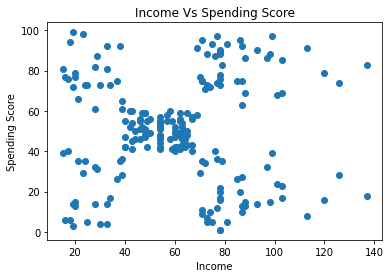

In [14]:
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
plt.scatter(x,y)
plt.title('Income Vs Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()


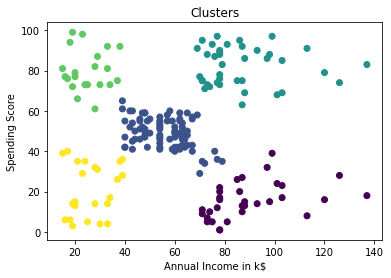

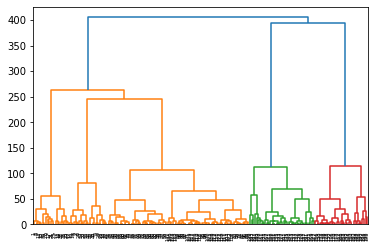

In [15]:
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
data = list(zip(x,y))
hierarchical_cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
predicted_labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x,y,c=predicted_labels)
plt.title('Clusters')
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score')
plt.show()

linkagedata = linkage(data, method = 'ward', metric ='euclidean')
dendrogram(linkagedata)
plt.show()
